<a href="https://colab.research.google.com/github/Guillem96/noised-mnist-challenge/blob/master/Normal_MNIST_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classifier Example

## Before you read

This notebook is not a learning guide. We only want to provide a quick overview of what a machine learning project pipeline looks like. 

What you should expect from this notebook:

- Little explanations about each machine learning project phase
- Some machine learning good practices
- Learn which are the trending technologies used in 'traditional ML'.

> Note: We refer as 'traditional ML' the machine learning techniques which are not related to deep learning algorithms. We do so to simplify writing and avoid conflicting terms and therfore making certain fanbases angry😨


Reading this notebook, you will acquire the necessary machine learning skills to at least sent us a solution for the proposed challenge. Also, we encourage you to take part in the challenge, because having a basic understanding of artificial intelligence will help you a lot during the hackathon 😉

If you want to acquire a stronger machine learning base, we recommend you to read this [book](https://www.amazon.es/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646). Also you can check the book's code freely [here](https://github.com/ageron/handson-ml2).


🏁 Without further ado we start with the MNIST example!

First of all we load the libraries which will be using during the example.

In [0]:
from collections import Counter

import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

## Essential libraries (& environments) for data science

### Jupyter notebook

The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text.

Learn more about jupyter notebook [here](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook).

### Google Colab

Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

We recommend you to run this notebook by clicking the top button: `Open in Colab`.

### Numpy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

[Getting started with NumPy!](https://docs.scipy.org/doc/numpy/user/quickstart.html)

## Pandas

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

[Getting started with pandas!](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673)

## Scikit-learn (sklearn)

Scikit-learn is a Python module integrating a wide range of state-of-the-art machine learning algorithms for medium-scale supervised and unsupervised problems. This package focuses on bringing machine learning to non-specialists using a general-purpose high-level language. Emphasis is put on ease of use, performance, documentation, and API consistency. It has minimal dependencies and is distributed under the simplified BSD license, encouraging its use in both academic and commercial settings.

[Getting started with Sklearn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

## Data ingestion

In this example we are going to use one of the most important ML datasets, MNIST.

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike. The MNIST database contains 60,000 training images and 10,000 testing images. 

![](https://corochann.com/wp-content/uploads/2017/02/mnist_plot-800x600.png)

Now, let's start coding 😁.

First of all, we need to gather the MNIST dataset. To do so, we are going to use the `fetch_openml` function that is provided by sklearn.

`fetch_openml` will download MNIST images to our computer and format them in order to return and x `numpy array` containing all the images and a y `numpy array` containing the image labels.




In [0]:
x, y = fetch_openml('mnist_784', return_X_y=True)
y = y.astype(np.int32)

In [0]:
print('Total images {}, Image size in pixels {}'.format(*x.shape))

Total images 70000, Image size in pixels 784


As we said earlier, we have 70000 images, each one being a number between 0 and 9 inclusive.

In this case, the data ingestion was simple because `sklearn` handled it for us, but sometimes performing a good data ingestion can become really hard.

Notice that image shape is 784 pixels. That is because `sklearn` flattens the images so we can feed them into a 'traditional ML algorithm' easier. So, if we want to plot the image or convert it to a tensor to use deep learning techniques, we will have to reshape it to their original size `(28, 28)`

## Data exploration

Data exploration is an approach similar to initial data analysis, whereby a data analyst uses visual exploration to understand what is in a dataset and the characteristics of the data, rather than through traditional data management systems.

As we are working with a well-know dataset our data exploration phase will be quite short.

First we are going to plot a pie chart to know the labels distribution. 

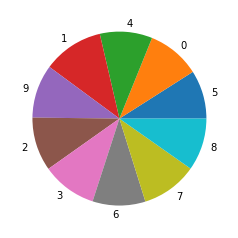

In [0]:
labels_freq = Counter(y) 
plt.pie(labels_freq.values(), 
        labels=list(labels_freq))
plt.show()

As expected, MNIST is a blanced dataset, meaning that it contains equal or almost equal number of samples from every class. 

Finally, in a computer vision problem, is a good practice to at least plot one sample of each class. In the following cell, we are going to plot a random sample of each digit.

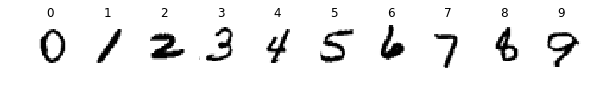

In [0]:
cols = 10
rows = 1
plt.figure(figsize=(10, 10))
for l in range(10): # Digits from 0 to 9
  plt.subplot(rows, cols, l + 1)
  l_digits = x[y == l]
  idx = np.random.randint(0, high=l_digits.shape[0], size=1)
  
  im = l_digits[idx]
  im = im.astype(np.float32) / 255.
  im = im.reshape(28, 28)
  
  plt.title(l)
  plt.imshow(im, cmap='binary')
  plt.axis('off')

## Train a model

Finally the cool part! 😁

In this section, we will train a model to recognize the handwritten digits.

When training an ML model is always a good practice to keep a sample of the data apart from the data we use to train the algorithm. This will allow us to evaluate our model using 'unseen' data. So, what we are going to do know is:

1. Split data between training and a test set.
  - **Training set**: Data sample used to train the model.
  - **Test set**: Data sample used to evaluate the resulting model.
2. Transform data to improve algorithm performance.
3. Train the algorithm with the transformed data.
4. Evaluate the model using classification metrics including: `precision`, `recall`, `confusion matrix`, etc.

In [0]:
# Create two data sets, one for training and the other one to evaluate the 
# resulting model
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=.33, 
                                                    random_state=42)

The data transformation is done using a sklearn pipeline.
A pipeline applies a set of transformations sequentially. One of the most important reasons to use pipelines is to simplify the [reproducibility](https://determined.ai/blog/reproducibility-in-ml) among the different experiments involving data.

In this example, the pipeline is composed of 2 steps:

1. *ImageScaler*: Usually image colors are represented using bytes (integers of 8 bits ranging from 0 up to 255). Usually, ML algorithms work better with small numbers, so this transformation divides all color bytes by 255 in the order they are scaled between 0 and 1. 

2. [*StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): In statistics, **standardization** is the process of putting different variables on the same **scale**. This process allows you to compare scores between different types of variables. Typically, to standardize variables, you calculate the **mean** and **standard deviation** for a variable. Furthermore, having all features represented on the same scale will allow the algorithm to generate better rules.


In [0]:
# We can define custom transformers of pipelines
class ImageScaler(BaseEstimator, TransformerMixin):

  def __init__(self, scale_factor):
    self.scale_factor = scale_factor

  def fit(self, x, y=None):
    return self
  
  def transform(self, x):
    x = x.astype(np.float64)
    x = x / float(self.scale_factor)
    return x

preprocessing_pipeline = Pipeline([('scale', ImageScaler(255)), 
                                   ('standardize', StandardScaler())])

In [0]:
# Apply the transformation
# Note: That we also fit the pipeline here, this is because
# we want the StandardScaler to learn the mean and std deviation
# of the training set
x_train_prep = preprocessing_pipeline.fit_transform(x_train)

In [0]:
# Train the model
rnd_forest = RandomForestClassifier(n_estimators=20, max_depth=10)
rnd_forest.fit(x_train_prep, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluate the model


The last thing we have to do is evaluate our model to know if it is good enough to be deployed in a production environment.

We won't dive into the evaluation methods here. If you are interested in classification metrics you can read this [article](https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b).

In [0]:
# Note: Here we only call transform because we are using the mean and std
# learned from the training set
x_test_prep = preprocessing_pipeline.transform(x_test)

In [0]:
# Make predictions
y_pred = rnd_forest.predict(x_test_prep)

To end with the example, we display the evaluation metrics of the model.


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2267
           1       0.95      0.98      0.97      2603
           2       0.93      0.93      0.93      2350
           3       0.93      0.91      0.92      2383
           4       0.93      0.92      0.93      2144
           5       0.95      0.92      0.94      2107
           6       0.96      0.97      0.96      2294
           7       0.95      0.93      0.94      2455
           8       0.92      0.90      0.91      2196
           9       0.88      0.92      0.90      2301

    accuracy                           0.94     23100
   macro avg       0.94      0.94      0.94     23100
weighted avg       0.94      0.94      0.94     23100



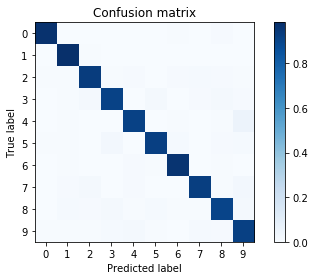

In [0]:
def plot_confusion_matrix(y_true, y_pred,
                          cmap=plt.cm.Blues):

    title = 'Confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    fig.tight_layout()

print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)
plt.show()

Wow! We got an almost perfect `confusion_matrix` 😎!!! 

Wait, clam down... we developed this model without making so much effort... You will have to think a little bit harder to complete the challenge successfully...🤔

We hope you learned a lot visiting this example and we are looking forward you in the **Noised MNIST challenge**.